### Import Libraries and Data


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import context
from os import path

from xgboost import XGBClassifier
import xgboost as xgb

import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score


%matplotlib inline
sns.set_theme(style="whitegrid")

abundance_df = pd.read_csv(path.join(context.proj_dir, 'data', 'abundance.csv'))
print("Dataset size: {}".format(abundance_df.shape))
abundance_df.head()

Dataset size: (3610, 3513)


c:\users\ahmad\myenvs\python3-9-env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,5,9,20,26,42,47,51,52,59,61,68,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploring/Cleaning Dataset

In [20]:
# lets work with diabetes only
abundance_df = abundance_df.loc[(abundance_df.dataset_name=='WT2D') | (abundance_df.dataset_name=='t2dmeta_long')|
                       (abundance_df.dataset_name=='t2dmeta_short'),:]

# change missing values to nan
abundance_df = abundance_df.replace('nd', np.nan).replace('na', np.nan).replace('-', np.nan).replace(' -', np.nan)
print(abundance_df.shape)
abundance_df.head()

(508, 3513)


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
2951,t2dmeta_long,CON-001,con-001,stool,n,21,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,t2dmeta_long,CON-002,con-002,stool,n,53,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2953,t2dmeta_long,CON-003,con-003,stool,n,61,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2954,t2dmeta_long,CON-004,con-004,stool,n,55,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,t2dmeta_long,CON-005,con-005,stool,n,53,female,china,Illumina,23023125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


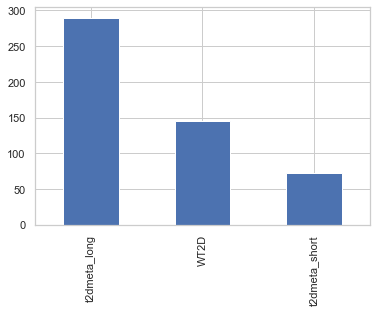

In [21]:
# unique datasets
df = abundance_df['dataset_name'].value_counts().plot.bar()

<AxesSubplot:ylabel='dataset_name'>

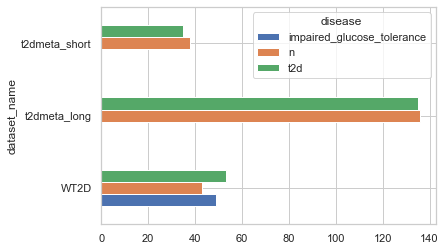

In [22]:
# Unique diseases in all datasets
abundance_df.groupby('dataset_name')['disease'].value_counts().unstack().plot.barh()

In [23]:
# divided the abundance data to metadata and species data
split_index = abundance_df.columns.get_loc('k__Archaea')
disease_metadata = abundance_df.iloc[:, 0:split_index]
disease_species = abundance_df.iloc[:, split_index:]
print("Disease Metadata: {}".format(disease_metadata.shape))
print("Disease Species: {}".format(disease_species.shape))

Disease Metadata: (508, 211)
Disease Species: (508, 3302)


In [24]:
# finding the columns with entry as na
cols = (  disease_metadata.isna().sum()  !=  len(disease_metadata)  )
# deleting the columns with every entry as na
disease_metadata_short = disease_metadata[cols[cols].index]
disease_metadata_short.shape

(508, 50)

In [25]:
# get rid of more redundant and unnecessary variables in metadata
unimportant =['subjectID', 'sequencing_technology', 'pubmedid','#SampleID',
           'diabetic','bodysite','classification']
disease_metadata_short = disease_metadata_short.drop(columns = unimportant)
disease_metadata_short.shape

(508, 43)

In [26]:
# finding the columns with max entry to zero to remove uninformative variables
# All values for species >=0, so a column with a max entry of zero means has all zeroes
cols = (  disease_species.max()  !=  0 )
#subseting the species data to informative variables
disease_species_short = disease_species[cols[cols].index]
disease_species_short.shape


(508, 1580)

In [27]:
# merge the metadata and species data together after filtering out uninformative variables
disease_short = disease_metadata_short.join(disease_species_short)
disease_short.head()

,dataset_name,sampleID,disease,age,gender,country,bmi,stage,height,weight,...,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii|t__Vibrio_furnissii_unclassified,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4|t__GCF_000157055,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis|t__Lysinibacillus_fusiformis_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus|t__Lysinibacillus_sphaericus_unclassified
2951,t2dmeta_long,CON-001,n,21,female,china,26.3,stage_ii,156,64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,t2dmeta_long,CON-002,n,53,female,china,26.67,stage_ii,150,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2953,t2dmeta_long,CON-003,n,61,female,china,25.07,stage_ii,156,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2954,t2dmeta_long,CON-004,n,55,female,china,25.39,stage_ii,160,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2955,t2dmeta_long,CON-005,n,53,female,china,26.67,stage_ii,150,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#all of the continuous and discrete variables in the metadata
num_var = ['age','bmi','height','weight','fbg','sbp','dbp','fins','fcp','hbalc','tg',
        'tcho','hdl','ldl','whr','wc','cholesterol','triglycerides','creatinine',
         'y-gt','fasting_glucose','fasting_insulin','hba1c','hscrp','c-peptide','tnfa',
         'il-1','cd163','years_in_sweden','glp-1','fgf-19','leptin','adiponectin',
         'gad-antibodies']
#converts all of the continuous and discrete variables to numeric
disease_short.loc[:, num_var] = disease_short.loc[:, num_var].apply(pd.to_numeric,
                                                                  errors='coerce', axis=1)
disease_short.shape

(508, 1623)

In [29]:
# replaces the missing values in cholesterol with tcho values
# tcho and cholesterol are from WT2D and T2Dmeta respectively and they both represent
# total cholesterol
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['tcho'])
disease_short['cholesterol'] = disease_short['cholesterol'].mask(disease_short['cholesterol'].isnull(), s)

In [30]:
# replaces the missing values in fasting_glucose with fbg values
# fasting_glucose and fbg are from WT2D and T2Dmeta respectively and they both represent
# fasting blood glucose
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['fbg'])
disease_short['fasting_glucose'] = disease_short['fasting_glucose'].mask(disease_short['fasting_glucose'].isnull(), s)

In [31]:
# replaces the missing values in triglycerides with tg values
# triglycerides and tg are from WT2D and T2Dmeta respectively and they both represent
# Triglyceride levels
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['tg'])
disease_short['triglycerides'] = disease_short['triglycerides'].mask(disease_short['triglycerides'].isnull(), s)

In [32]:
# replaces the missing values in fasting_insulin with fins values
# fasting_insulin and fins (Fasting Insulin Serum) are from WT2D and T2Dmeta respectively and they both represent
# fasting insulin serum
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['fins'])
disease_short['fasting_insulin'] = disease_short['fasting_insulin'].mask(disease_short['fasting_insulin'].isnull(), s)
disease_short.shape

(508, 1623)

In [33]:
#gender is not recorded for the WT2D data b/c it was a study conducted on only women.
#replace all nas with female in WT2D
mask1 = (disease_short.dataset_name == "WT2D") & (disease_short.gender.isna())
disease_short.loc[mask1, 'gender'] = 'female'

In [34]:
redundant = ['tcho','fbg','fins','tg']
disease_short = disease_short.drop(columns=redundant)
disease_short.shape

(508, 1619)

In [35]:
disease_short = disease_short.replace(['n','impaired_glucose_tolerance',"t2d"],
                                      ['No Diabetes','Pre-Diabetes',"Type 2 Diabetes"])